In [25]:
import pandas as pd
import numpy as np 
import string 
import spacy 
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')

In [30]:
kindle = pd.read_excel('Amazon-reivew-export.xlsx')
kindle

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant
0,5.0 out of 5 stars,Sivaprasad,https://www.amazon.in/gp/customer-reviews/R18Z...,Super Speed,Excellently Working,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 19 February 2023,0,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
1,2.0 out of 5 stars,Vidul,https://www.amazon.in/gp/customer-reviews/RD25...,Hanging,Started hanging on the first day itself,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 19 March 2023,3 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
2,2.0 out of 5 stars,Alan,https://www.amazon.in/gp/customer-reviews/RQC0...,Nice laptop but sata hdd port not available,I recently purchased this laptop. But the one ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 February 2023,8 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
3,1.0 out of 5 stars,Sangeeta kumari,https://www.amazon.in/gp/customer-reviews/R3J4...,Display so bad - movies or anything cheap qua...,"If you tube or movies, it's so bad, like watch...",NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 22 April 2023,3 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
4,5.0 out of 5 stars,Anubhav,https://www.amazon.in/gp/customer-reviews/R1PK...,Nice,It is working good thnq,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 25 January 2023,2 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
5,3.0 out of 5 stars,Shrinivas Telgar,https://www.amazon.in/gp/customer-reviews/R1R0...,Performance wise it's good but display is not...,Display like whitish keyboard color is not good,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 1 October 2022,10 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
6,1.0 out of 5 stars,Chandan Rai,https://www.amazon.in/gp/customer-reviews/R37P...,Battery backup,Don't purchase very bad battery backup.. only ...,\n,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 15 April 2023,One person found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
7,4.0 out of 5 stars,Satyam Kumar Jha,https://www.amazon.in/gp/customer-reviews/R3NV...,Lenovo IdeaPad slim 3 (i3 generation/256gbssd),Bought it for 33k on 21/April/2023\nPros:-\nB...,\n \n \n,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 21 April 2023,3 people found this helpful,NaN,Colour: Platinum GreyPattern Name: Lenovo Idea...
8,5.0 out of 5 stars,JITENDRA SHARMA,https://www.amazon.in/gp/customer-reviews/R3PP...,Value for money,Product build quality is good. it’s lightweigh...,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 3 October 2022,5 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
9,5.0 out of 5 stars,Rajesh kumar gupta,https://www.amazon.in/gp/customer-reviews/R2CC...,Good product,It is value for money. Best for education .,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 25 November 2022,3 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...


In [31]:
kindle = kindle['Review Content']
kindle

0                                   Excellently Working
1               Started hanging on the first day itself
2     I recently purchased this laptop. But the one ...
3     If you tube or movies, it's so bad, like watch...
4                               It is working good thnq
5       Display like whitish keyboard color is not good
6     Don't purchase very bad battery backup.. only ...
7      Bought it for 33k on 21/April/2023\nPros:-\nB...
8     Product build quality is good. it’s lightweigh...
9           It is value for money. Best for education .
10    This product display is not Good and there is ...
11    THE PRODUCT QUALITY IS REALLY VERY VERY BAD. I...
12    Product is very good as expected.\nmy kids are...
13                                    Education purpose
14    Battery backup is too poor, If you are looking...
15    It is great for its price but after 2 months i...
16    The power adaptor was missing. Laptop was ok. ...
17     Opened the box to find that the internal 

In [32]:
kindle = [y.strip() for y in kindle]
kindle

['Excellently Working',
 'Started hanging on the first day itself',
 "I recently purchased this laptop. But the one I received doesn't had sata hdd port. So I returned. Rest all features was good at 32890 price.",
 "If you tube or movies, it's so bad, like watching in 2d, weird it feels. And too much blue tint on this laptop... I wanted to return but money got wasted.\n\nI read comments and bought it, but that was a big mistake.",
 'It is working good thnq',
 'Display like whitish keyboard color is not good',
 "Don't purchase very bad battery backup.. only 2 hrs backup..and also customer service is bad ..no any person customer service person help about your problem...",
 "Bought it for 33k on 21/April/2023\nPros:-\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons:-\nLow Build quality (Fan wind causes screen to shake )\n\nNote:- overall the laptop is good except it's built quality",
 'Product build quality is good. it’s lightweight and fast wit

In [33]:
kindle = [x for x in kindle if x] 
kindle

['Excellently Working',
 'Started hanging on the first day itself',
 "I recently purchased this laptop. But the one I received doesn't had sata hdd port. So I returned. Rest all features was good at 32890 price.",
 "If you tube or movies, it's so bad, like watching in 2d, weird it feels. And too much blue tint on this laptop... I wanted to return but money got wasted.\n\nI read comments and bought it, but that was a big mistake.",
 'It is working good thnq',
 'Display like whitish keyboard color is not good',
 "Don't purchase very bad battery backup.. only 2 hrs backup..and also customer service is bad ..no any person customer service person help about your problem...",
 "Bought it for 33k on 21/April/2023\nPros:-\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons:-\nLow Build quality (Fan wind causes screen to shake )\n\nNote:- overall the laptop is good except it's built quality",
 'Product build quality is good. it’s lightweight and fast wit

In [34]:
# Joining the list into one string/text
text = ' '.join(kindle)
text

"Excellently Working Started hanging on the first day itself I recently purchased this laptop. But the one I received doesn't had sata hdd port. So I returned. Rest all features was good at 32890 price. If you tube or movies, it's so bad, like watching in 2d, weird it feels. And too much blue tint on this laptop... I wanted to return but money got wasted.\n\nI read comments and bought it, but that was a big mistake. It is working good thnq Display like whitish keyboard color is not good Don't purchase very bad battery backup.. only 2 hrs backup..and also customer service is bad ..no any person customer service person help about your problem... Bought it for 33k on 21/April/2023\nPros:-\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons:-\nLow Build quality (Fan wind causes screen to shake )\n\nNote:- overall the laptop is good except it's built quality Product build quality is good. it’s lightweight and fast with new 11gen processor with ssd. 1

In [35]:
#Punctuation
no_punc_text = text.translate(str.maketrans("", "", string.punctuation)) 
no_punc_text

'Excellently Working Started hanging on the first day itself I recently purchased this laptop But the one I received doesnt had sata hdd port So I returned Rest all features was good at 32890 price If you tube or movies its so bad like watching in 2d weird it feels And too much blue tint on this laptop I wanted to return but money got wasted\n\nI read comments and bought it but that was a big mistake It is working good thnq Display like whitish keyboard color is not good Dont purchase very bad battery backup only 2 hrs backupand also customer service is bad no any person customer service person help about your problem Bought it for 33k on 21April2023\nPros\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons\nLow Build quality Fan wind causes screen to shake \n\nNote overall the laptop is good except its built quality Product build quality is good it’s lightweight and fast with new 11gen processor with ssd 1 year product warranty Overall best for

In [36]:
#Tokenization
from nltk.tokenize import word_tokenize

text_tokens = word_tokenize(no_punc_text)
text_tokens

['Excellently',
 'Working',
 'Started',
 'hanging',
 'on',
 'the',
 'first',
 'day',
 'itself',
 'I',
 'recently',
 'purchased',
 'this',
 'laptop',
 'But',
 'the',
 'one',
 'I',
 'received',
 'doesnt',
 'had',
 'sata',
 'hdd',
 'port',
 'So',
 'I',
 'returned',
 'Rest',
 'all',
 'features',
 'was',
 'good',
 'at',
 '32890',
 'price',
 'If',
 'you',
 'tube',
 'or',
 'movies',
 'its',
 'so',
 'bad',
 'like',
 'watching',
 'in',
 '2d',
 'weird',
 'it',
 'feels',
 'And',
 'too',
 'much',
 'blue',
 'tint',
 'on',
 'this',
 'laptop',
 'I',
 'wanted',
 'to',
 'return',
 'but',
 'money',
 'got',
 'wasted',
 'I',
 'read',
 'comments',
 'and',
 'bought',
 'it',
 'but',
 'that',
 'was',
 'a',
 'big',
 'mistake',
 'It',
 'is',
 'working',
 'good',
 'thnq',
 'Display',
 'like',
 'whitish',
 'keyboard',
 'color',
 'is',
 'not',
 'good',
 'Dont',
 'purchase',
 'very',
 'bad',
 'battery',
 'backup',
 'only',
 '2',
 'hrs',
 'backupand',
 'also',
 'customer',
 'service',
 'is',
 'bad',
 'no',
 'any',
 

In [37]:
text_tokens[0:72]

['Excellently',
 'Working',
 'Started',
 'hanging',
 'on',
 'the',
 'first',
 'day',
 'itself',
 'I',
 'recently',
 'purchased',
 'this',
 'laptop',
 'But',
 'the',
 'one',
 'I',
 'received',
 'doesnt',
 'had',
 'sata',
 'hdd',
 'port',
 'So',
 'I',
 'returned',
 'Rest',
 'all',
 'features',
 'was',
 'good',
 'at',
 '32890',
 'price',
 'If',
 'you',
 'tube',
 'or',
 'movies',
 'its',
 'so',
 'bad',
 'like',
 'watching',
 'in',
 '2d',
 'weird',
 'it',
 'feels',
 'And',
 'too',
 'much',
 'blue',
 'tint',
 'on',
 'this',
 'laptop',
 'I',
 'wanted',
 'to',
 'return',
 'but',
 'money',
 'got',
 'wasted',
 'I',
 'read',
 'comments',
 'and',
 'bought',
 'it']

In [38]:
len(text_tokens)

636

In [39]:
from nltk.corpus import stopwords

In [40]:
my_stop_words = stopwords.words('english')
my_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:65])

['Excellently', 'Working', 'Started', 'hanging', 'first', 'day', 'I', 'recently', 'purchased', 'laptop', 'But', 'one', 'I', 'received', 'doesnt', 'sata', 'hdd', 'port', 'So', 'I', 'returned', 'Rest', 'features', 'good', '32890', 'price', 'If', 'tube', 'movies', 'bad', 'like', 'watching', '2d', 'weird', 'feels', 'And', 'much', 'blue', 'tint', 'laptop', 'I', 'wanted', 'return', 'money', 'got', 'wasted', 'I', 'read', 'comments', 'bought', 'big', 'mistake', 'It', 'working', 'good', 'thnq', 'Display', 'like', 'whitish', 'keyboard', 'color', 'good', 'Dont', 'purchase', 'bad']


In [42]:
#Noramalize the data
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:45])

['excellently', 'working', 'started', 'hanging', 'first', 'day', 'i', 'recently', 'purchased', 'laptop', 'but', 'one', 'i', 'received', 'doesnt', 'sata', 'hdd', 'port', 'so', 'i', 'returned', 'rest', 'features', 'good', '32890', 'price', 'if', 'tube', 'movies', 'bad', 'like', 'watching', '2d', 'weird', 'feels', 'and', 'much', 'blue', 'tint', 'laptop', 'i', 'wanted', 'return', 'money', 'got']


In [43]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['excel', 'work', 'start', 'hang', 'first', 'day', 'i', 'recent', 'purchas', 'laptop', 'but', 'one', 'i', 'receiv', 'doesnt', 'sata', 'hdd', 'port', 'so', 'i', 'return', 'rest', 'featur', 'good', '32890', 'price', 'if', 'tube', 'movi', 'bad', 'like', 'watch', '2d', 'weird', 'feel', 'and', 'much', 'blue', 'tint', 'laptop']


In [44]:
# NLP english language model of spacy library
nlp = spacy.load('en_core_web_sm')

In [45]:
# lemmas being one of them, but mostly POS, which will follow later
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Excellently Working Started hanging first day I recently purchased laptop But one I received doesnt sata hdd port So I returned Rest features good 32890 price If tube movies bad like watching 2d weird feels And much blue tint


In [46]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:22])

['excellently', 'Working', 'start', 'hang', 'first', 'day', 'I', 'recently', 'purchase', 'laptop', 'but', 'one', 'I', 'receive', 'do', 'not', 'sata', 'hdd', 'port', 'so', 'I', 'return']


# FEATURE EXTRACTION

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [48]:
pd.DataFrame.from_records([vectorizer.vocabulary_])

,excellently,working,start,hang,first,day,recently,purchase,laptop,but,...,alloverall,lappy,rating,810,speedonly,complaint,charger,design,make,compact
0,70,230,198,91,82,58,170,161,112,37,...,10,111,165,7,195,50,41,61,122,47


In [49]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T

,0
excellently,70
working,230
start,198
hang,91
first,82
...,...
complaint,50
charger,41
design,61
make,122


In [50]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head(30)

,0
yrs,235
youtube,234
you,233
yet,232
year,231
working,230
work,229
wind,228
whitish,227
weird,226


In [51]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=True).head(25)

,0
11gen,0
20,1
21april2023,2
25,3
2d,4
32890,5
33k,6
810,7
adaptor,8
ago,9


In [52]:
print(vectorizer.vocabulary_)

{'excellently': 70, 'working': 230, 'start': 198, 'hang': 91, 'first': 82, 'day': 58, 'recently': 170, 'purchase': 161, 'laptop': 112, 'but': 37, 'one': 144, 'receive': 169, 'do': 63, 'not': 137, 'sata': 179, 'hdd': 95, 'port': 152, 'so': 190, 'return': 177, 'rest': 176, 'feature': 79, 'good': 87, '32890': 5, 'price': 154, 'if': 102, 'tube': 212, 'movie': 131, 'bad': 20, 'like': 117, 'watch': 225, '2d': 4, 'weird': 226, 'feel': 80, 'and': 13, 'much': 132, 'blue': 28, 'tint': 211, 'want': 221, 'money': 128, 'got': 88, 'waste': 224, 'read': 167, 'comment': 46, 'buy': 38, 'big': 26, 'mistake': 126, 'it': 107, 'work': 229, 'thnq': 210, 'display': 62, 'whitish': 227, 'keyboard': 109, 'color': 44, 'battery': 21, 'backup': 18, 'hrs': 100, 'backupand': 19, 'also': 12, 'customer': 55, 'service': 185, 'person': 148, 'help': 96, 'problem': 156, '33k': 6, '21april2023': 2, 'pro': 155, 'best': 25, 'budget': 34, 'range': 164, 'audio': 16, 'quality': 163, 'screen': 182, 'decent': 59, 'cons': 51, 'low

In [53]:
print(vectorizer.get_feature_names()[50:100])

['complaint', 'cons', 'control', 'cool', 'coz', 'customer', 'cx', 'dark', 'day', 'decent', 'description', 'design', 'display', 'do', 'due', 'education', 'end', 'engine', 'eventually', 'ever', 'excellently', 'except', 'expect', 'experience', 'extra', 'eye', 'fail', 'fan', 'fast', 'feature', 'feel', 'find', 'first', 'fix', 'gamingfront', 'gets', 'go', 'good', 'got', 'great', 'half', 'hang', 'happy', 'hardware', 'have', 'hdd', 'help', 'high', 'hire', 'hour']


# Bigram and trigram

In [55]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,4),max_features = 100)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(kindle)
bow_matrix_ngram

<25x100 sparse matrix of type '<class 'numpy.int64'>'
	with 317 stored elements in Compressed Sparse Row format>

In [56]:
print(vectorizer_ngram_range.get_feature_names())

['about', 'and', 'any', 'are', 'are looking', 'around', 'background', 'backup', 'backup is', 'bad', 'battery', 'battery backup', 'battery backup is', 'best', 'best for', 'build', 'but', 'buy', 'buy lenovo', 'company', 'customer', 'customer service', 'display', 'display is', 'don', 'fan', 'for', 'for it', 'good', 'good at', 'had', 'have', 'having', 'if', 'if you', 'in', 'in this', 'is', 'is good', 'is not', 'is not good', 'issue', 'it', 'it is', 'its', 'laptop', 'laptops', 'lenovo', 'lenovo laptops', 'like', 'money', 'no', 'not', 'not good', 'now', 'of', 'official', 'official work', 'ok', 'on', 'only', 'or', 'overall', 'poor', 'price', 'product', 'purchase', 'purchased', 'quality', 'quality is', 'quality is good', 'really', 'screen', 'sometimes', 'started', 'technician', 'than', 'that', 'the', 'their', 'this', 'this laptop', 'this product', 'to', 'ur', 'use', 'use laptop', 'value', 'value for', 'value for money', 'very', 'very bad', 'very very', 'video', 'warranty', 'was', 'will', 'work

In [57]:
print(bow_matrix_ngram.toarray())

[[0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 2 1]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


# TFIDF

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_n_gram_max_features = TfidfVectorizer(norm="",
                                                 analyzer='word',
                                                 ngram_range=(1,4),
                                                 max_features = 100)



In [60]:
tf_idf_matrix_n_gram_max_features = vectorizer_n_gram_max_features.fit_transform(kindle)

In [61]:
print(vectorizer_n_gram_max_features.get_feature_names())

['about', 'and', 'any', 'are', 'are looking', 'around', 'background', 'backup', 'backup is', 'bad', 'battery', 'battery backup', 'battery backup is', 'best', 'best for', 'build', 'but', 'buy', 'buy lenovo', 'company', 'customer', 'customer service', 'display', 'display is', 'don', 'fan', 'for', 'for it', 'good', 'good at', 'had', 'have', 'having', 'if', 'if you', 'in', 'in this', 'is', 'is good', 'is not', 'is not good', 'issue', 'it', 'it is', 'its', 'laptop', 'laptops', 'lenovo', 'lenovo laptops', 'like', 'money', 'no', 'not', 'not good', 'now', 'of', 'official', 'official work', 'ok', 'on', 'only', 'or', 'overall', 'poor', 'price', 'product', 'purchase', 'purchased', 'quality', 'quality is', 'quality is good', 'really', 'screen', 'sometimes', 'started', 'technician', 'than', 'that', 'the', 'their', 'this', 'this laptop', 'this product', 'to', 'ur', 'use', 'use laptop', 'value', 'value for', 'value for money', 'very', 'very bad', 'very very', 'video', 'warranty', 'was', 'will', 'work

In [62]:
print(tf_idf_matrix_n_gram_max_features.toarray())

[[0.         0.         0.         ... 2.87180218 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         1.95551145 0.         ... 0.         7.12989871 2.87180218]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [3.15948425 0.         0.         ... 0.         0.         0.        ]]


# generate wordcloud


In [63]:
# Define a function to plot word cloud

def plot_cloud(wordcloud):
    
    
    plt.figure(figsize=(60, 40))    # Set figure size

    
    plt.imshow(wordcloud)           # Display image
    
    
    plt.axis("off") 

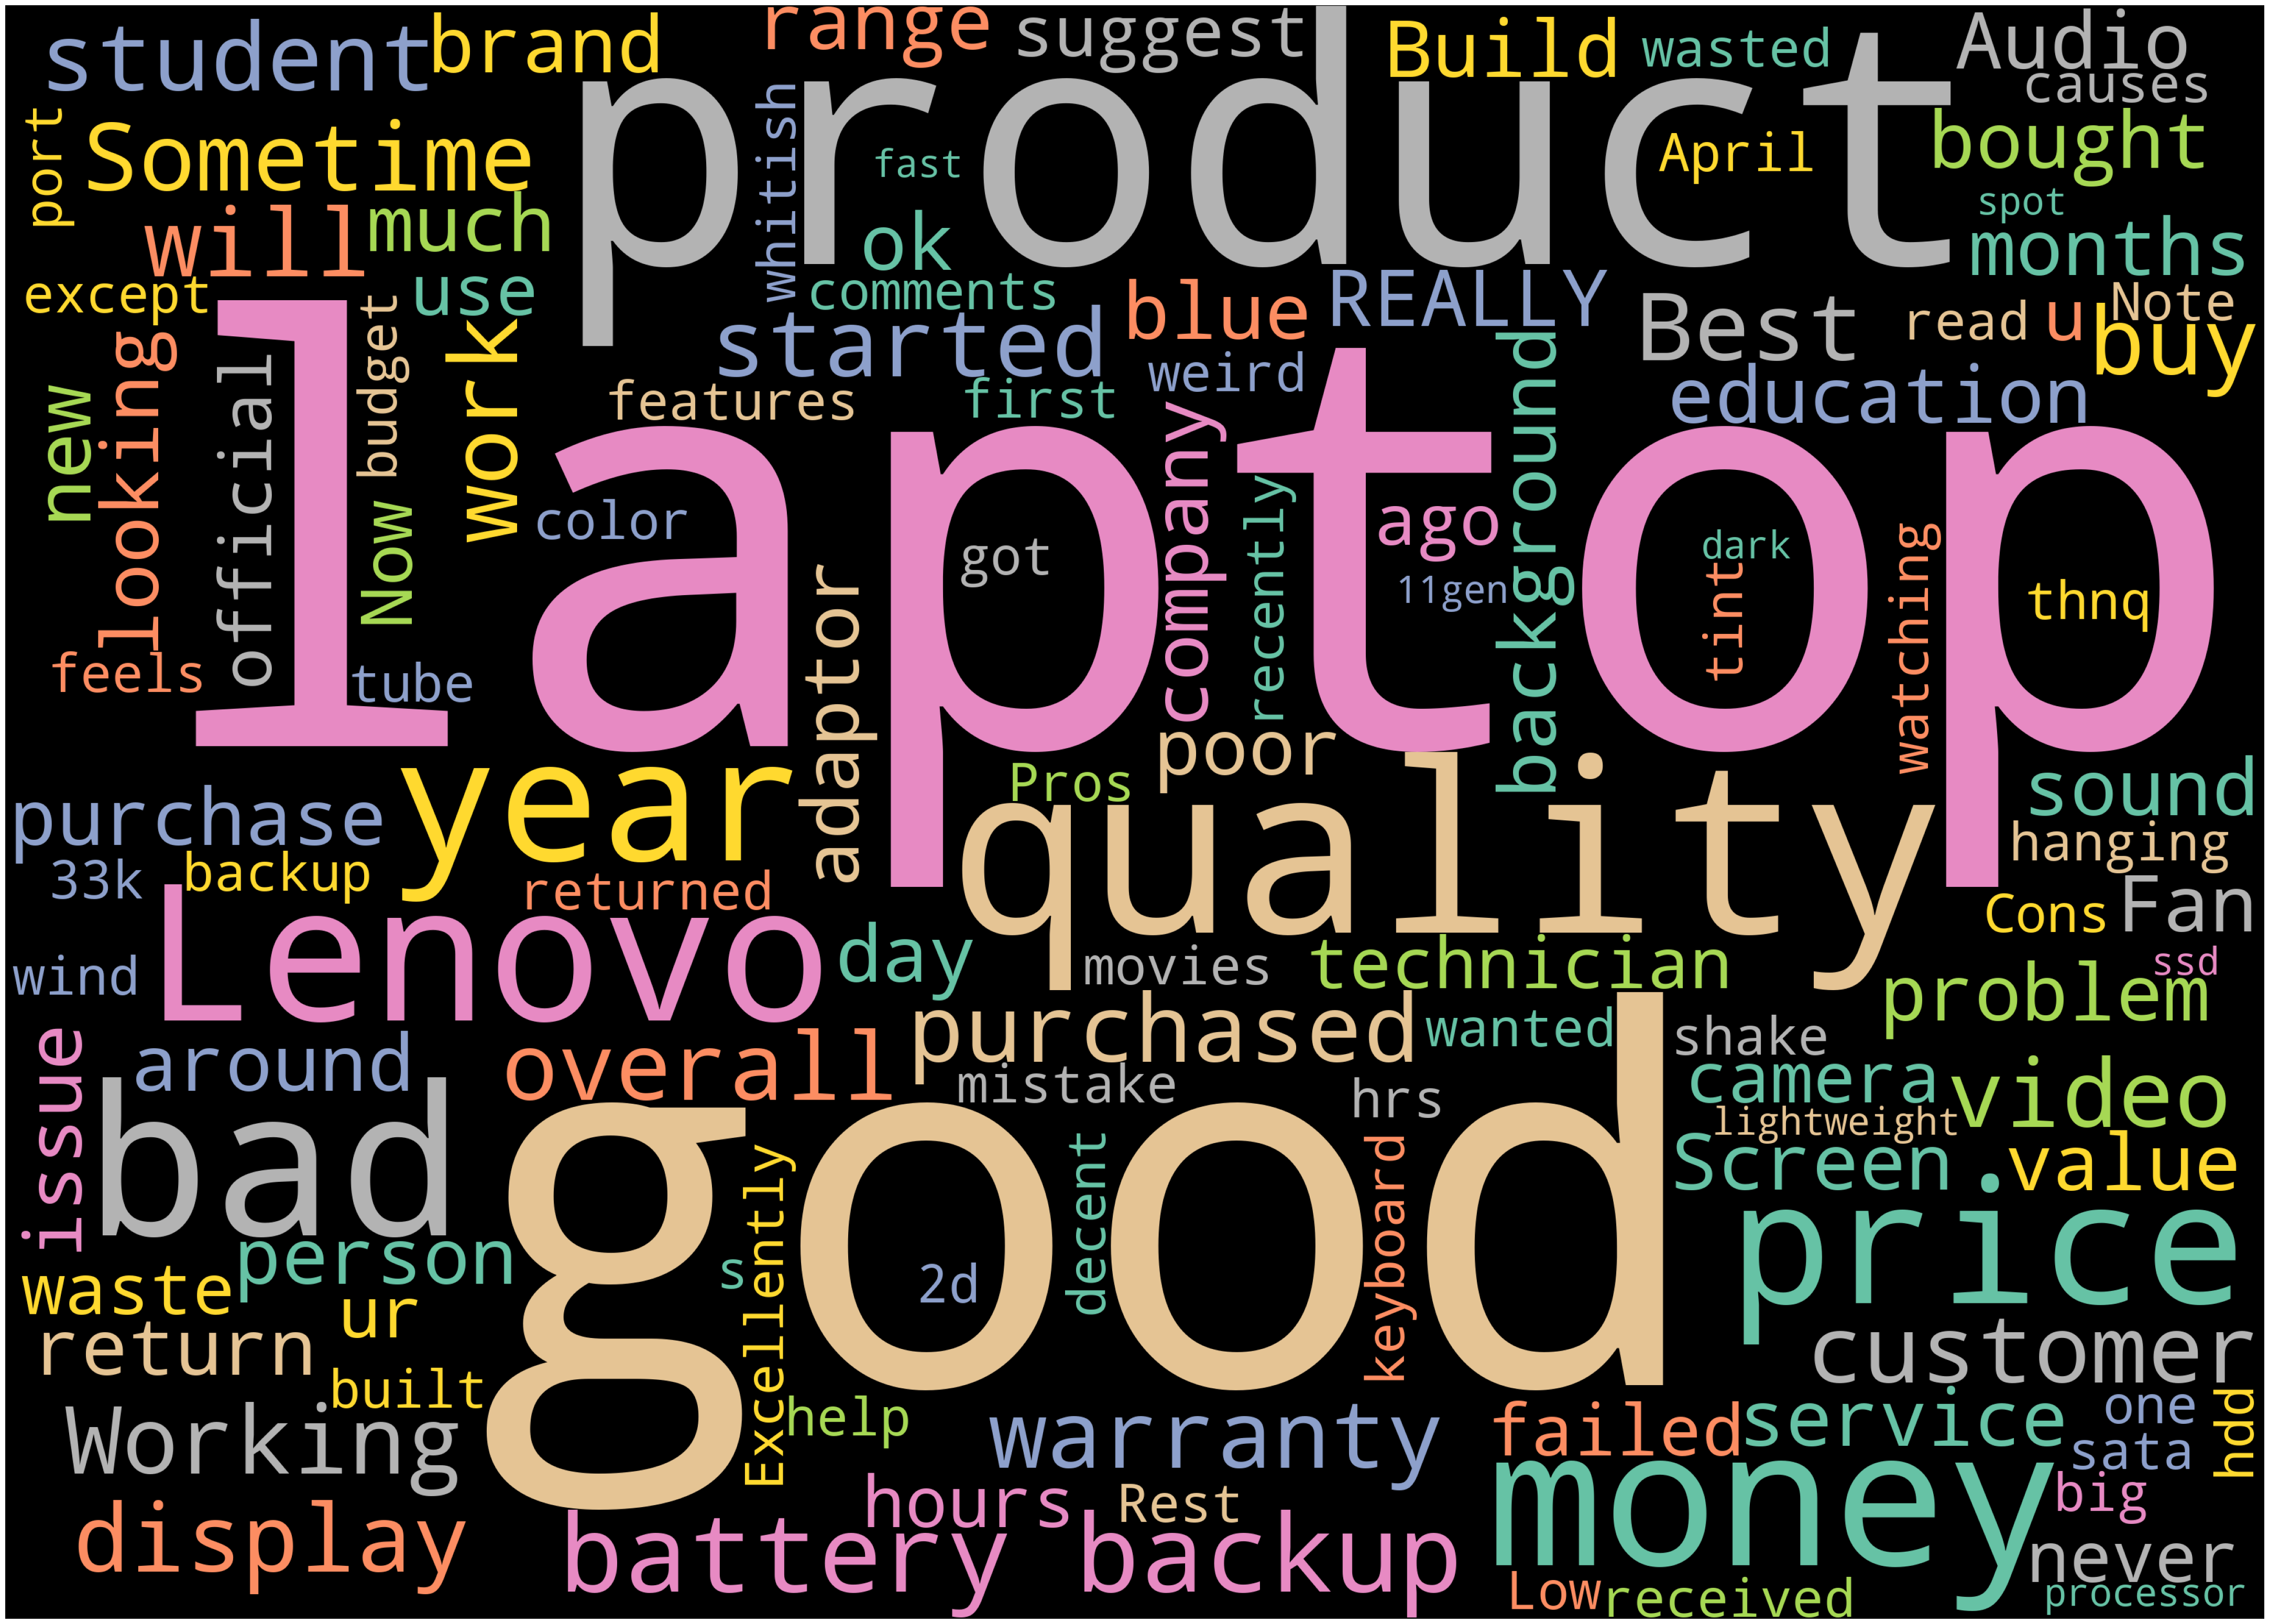

In [64]:
# Generate wordcloud
wordcloud = WordCloud(width = 3500, 
                      height = 2500,
                      background_color='black',
                      max_words=120,
                      colormap='Set2').generate(text)
# Plot
plot_cloud(wordcloud)

In [65]:
kindle2 = pd.read_excel('Amazon-reivew-export.xlsx')
kindle2

,Star-rating,Name,Reviewer Profile Url,Review Title,Review Content,images,profile icon,Date,helpful,verified,variant
0,5.0 out of 5 stars,Sivaprasad,https://www.amazon.in/gp/customer-reviews/R18Z...,Super Speed,Excellently Working,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 19 February 2023,0,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
1,2.0 out of 5 stars,Vidul,https://www.amazon.in/gp/customer-reviews/RD25...,Hanging,Started hanging on the first day itself,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 19 March 2023,3 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
2,2.0 out of 5 stars,Alan,https://www.amazon.in/gp/customer-reviews/RQC0...,Nice laptop but sata hdd port not available,I recently purchased this laptop. But the one ...,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 12 February 2023,8 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
3,1.0 out of 5 stars,Sangeeta kumari,https://www.amazon.in/gp/customer-reviews/R3J4...,Display so bad - movies or anything cheap qua...,"If you tube or movies, it's so bad, like watch...",NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 22 April 2023,3 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
4,5.0 out of 5 stars,Anubhav,https://www.amazon.in/gp/customer-reviews/R1PK...,Nice,It is working good thnq,NaN,https://images-eu.ssl-images-amazon.com/images...,Reviewed in India on 25 January 2023,2 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
5,3.0 out of 5 stars,Shrinivas Telgar,https://www.amazon.in/gp/customer-reviews/R1R0...,Performance wise it's good but display is not...,Display like whitish keyboard color is not good,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 1 October 2022,10 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
6,1.0 out of 5 stars,Chandan Rai,https://www.amazon.in/gp/customer-reviews/R37P...,Battery backup,Don't purchase very bad battery backup.. only ...,\n,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 15 April 2023,One person found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
7,4.0 out of 5 stars,Satyam Kumar Jha,https://www.amazon.in/gp/customer-reviews/R3NV...,Lenovo IdeaPad slim 3 (i3 generation/256gbssd),Bought it for 33k on 21/April/2023\nPros:-\nB...,\n \n \n,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 21 April 2023,3 people found this helpful,NaN,Colour: Platinum GreyPattern Name: Lenovo Idea...
8,5.0 out of 5 stars,JITENDRA SHARMA,https://www.amazon.in/gp/customer-reviews/R3PP...,Value for money,Product build quality is good. it’s lightweigh...,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 3 October 2022,5 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...
9,5.0 out of 5 stars,Rajesh kumar gupta,https://www.amazon.in/gp/customer-reviews/R2CC...,Good product,It is value for money. Best for education .,NaN,https://images-na.ssl-images-amazon.com/images...,Reviewed in India on 25 November 2022,3 people found this helpful,Verified Purchase,Colour: Platinum GreyPattern Name: Lenovo Idea...


In [66]:
kindle2 = kindle2['Review Content']
kindle2

0                                   Excellently Working
1               Started hanging on the first day itself
2     I recently purchased this laptop. But the one ...
3     If you tube or movies, it's so bad, like watch...
4                               It is working good thnq
5       Display like whitish keyboard color is not good
6     Don't purchase very bad battery backup.. only ...
7      Bought it for 33k on 21/April/2023\nPros:-\nB...
8     Product build quality is good. it’s lightweigh...
9           It is value for money. Best for education .
10    This product display is not Good and there is ...
11    THE PRODUCT QUALITY IS REALLY VERY VERY BAD. I...
12    Product is very good as expected.\nmy kids are...
13                                    Education purpose
14    Battery backup is too poor, If you are looking...
15    It is great for its price but after 2 months i...
16    The power adaptor was missing. Laptop was ok. ...
17     Opened the box to find that the internal 

In [67]:
kindle2 = [x.strip() for x in kindle2] # remove both the leading and the trailing characters
kindle2 = [x for x in kindle2 if x] # removes empty strings, because they are considered in Python as False
kindle2[0:10]

['Excellently Working',
 'Started hanging on the first day itself',
 "I recently purchased this laptop. But the one I received doesn't had sata hdd port. So I returned. Rest all features was good at 32890 price.",
 "If you tube or movies, it's so bad, like watching in 2d, weird it feels. And too much blue tint on this laptop... I wanted to return but money got wasted.\n\nI read comments and bought it, but that was a big mistake.",
 'It is working good thnq',
 'Display like whitish keyboard color is not good',
 "Don't purchase very bad battery backup.. only 2 hrs backup..and also customer service is bad ..no any person customer service person help about your problem...",
 "Bought it for 33k on 21/April/2023\nPros:-\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons:-\nLow Build quality (Fan wind causes screen to shake )\n\nNote:- overall the laptop is good except it's built quality",
 'Product build quality is good. it’s lightweight and fast wit

In [70]:
one_block = kindle2[7]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block, style='ent', jupyter=True)

In [71]:
one_block

"Bought it for 33k on 21/April/2023\nPros:-\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons:-\nLow Build quality (Fan wind causes screen to shake )\n\nNote:- overall the laptop is good except it's built quality"

In [72]:
for token in doc_block[:]:
    print(token, token.pos_)

Bought VERB
it PRON
for ADP
33k NOUN
on ADP
21 NUM
/ SYM
April/2023 PROPN

 SPACE
Pros:- PROPN

 SPACE
Best ADJ
laptop NOUN
in ADP
this DET
budget NOUN
range NOUN

 SPACE
Audio PROPN
quality NOUN
is AUX
good ADJ
👍 PUNCT

 SPACE
Screen PROPN
quality NOUN
is AUX
decent ADJ


 SPACE
Cons:- PROPN

 SPACE
Low ADJ
Build PROPN
quality NOUN
( PUNCT
Fan PROPN
wind NOUN
causes VERB
screen NOUN
to PART
shake VERB
) PUNCT


 SPACE
Note:- PROPN
overall ADV
the DET
laptop NOUN
is AUX
good ADJ
except SCONJ
it PRON
's AUX
built VERB
quality NOUN


In [74]:
#Filtering for nouns and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
nouns_verbs

['Bought',
 '33k',
 'laptop',
 'budget',
 'range',
 'quality',
 'quality',
 'quality',
 'wind',
 'causes',
 'screen',
 'shake',
 'laptop',
 'built',
 'quality']

In [75]:
len(nouns_verbs)

15

In [76]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
X

<15x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [77]:
cv.get_feature_names()

['33k',
 'bought',
 'budget',
 'built',
 'causes',
 'laptop',
 'quality',
 'range',
 'screen',
 'shake',
 'wind']

In [78]:

X.toarray()


array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=int64)

In [79]:
#pd.DataFrame(X.toarray(), columns = sorted(cv.vocabulary_))
# Or
temp_df = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())
temp_df

,33k,bought,budget,built,causes,laptop,quality,range,screen,shake,wind
0,0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,1,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,1,0,0,0,0,0,0


In [80]:
sum_words = X.sum(axis=0) #Column total
sum_words

matrix([[1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 1]], dtype=int64)

In [81]:
type(sum_words)

numpy.matrix

In [82]:
cv.vocabulary_

{'bought': 1,
 '33k': 0,
 'laptop': 5,
 'budget': 2,
 'range': 7,
 'quality': 6,
 'wind': 10,
 'causes': 4,
 'screen': 8,
 'shake': 9,
 'built': 3}

In [83]:
wf_df = pd.DataFrame({'word' : cv.get_feature_names(),
                      'count' : np.array(sum_words).flatten()})
wf_df

,word,count
0,33k,1
1,bought,1
2,budget,1
3,built,1
4,causes,1
5,laptop,2
6,quality,4
7,range,1
8,screen,1
9,shake,1


# Visualising results



<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

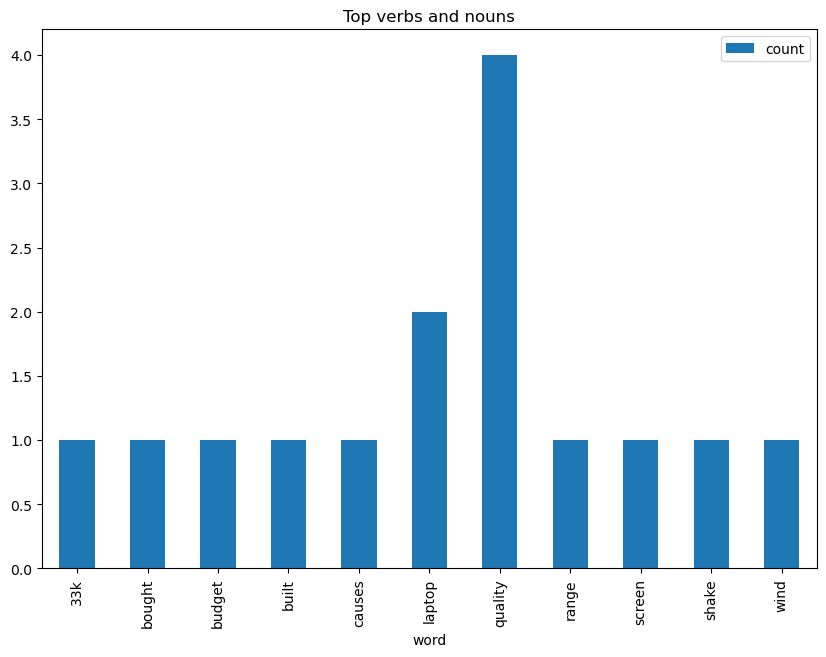

In [84]:
#Barchart for top 10 nouns + verbs
wf_df[0:15].plot.bar(x='word', figsize=(10,7), title='Top verbs and nouns')


# Emotion mining


In [85]:
#Sentiment analysis
dff = pd.read_csv('Afinn.csv', 
                   error_bad_lines=False, 
                   sep = ",", 
                   encoding = 'latin-1')
dff

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [87]:
dff[1500:]

,word,value
1500,masterpieces,4
1501,matter,1
1502,matters,1
1503,mature,2
1504,meaningful,2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [88]:
from nltk import tokenize

sentences = tokenize.sent_tokenize(" ".join(kindle2))

#sentences[5:15]
sentences

['Excellently Working Started hanging on the first day itself I recently purchased this laptop.',
 "But the one I received doesn't had sata hdd port.",
 'So I returned.',
 'Rest all features was good at 32890 price.',
 "If you tube or movies, it's so bad, like watching in 2d, weird it feels.",
 'And too much blue tint on this laptop...',
 'I wanted to return but money got wasted.',
 'I read comments and bought it, but that was a big mistake.',
 "It is working good thnq Display like whitish keyboard color is not good Don't purchase very bad battery backup.. only 2 hrs backup..and also customer service is bad ..no any person customer service person help about your problem... Bought it for 33k on 21/April/2023\nPros:-\nBest laptop in this budget range\nAudio quality is good 👍\nScreen quality is decent\n\nCons:-\nLow Build quality (Fan wind causes screen to shake )\n\nNote:- overall the laptop is good except it's built quality Product build quality is good.",
 'it’s lightweight and fast wi

In [89]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Excellently Working Started hanging on the fir...
1,But the one I received doesn't had sata hdd port.
2,So I returned.
3,Rest all features was good at 32890 price.
4,"If you tube or movies, it's so bad, like watch..."
5,And too much blue tint on this laptop...
6,I wanted to return but money got wasted.
7,"I read comments and bought it, but that was a ..."
8,It is working good thnq Display like whitish k...
9,it’s lightweight and fast with new 11gen proce...


In [90]:
affinity_scores =dff.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [91]:
nlp = spacy.load('en_core_web_sm')

In [92]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        #print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0) #return 0 if key not found
    return sent_score

In [93]:
# test that it works
calculate_sentiment(text = 'Amazing, wonderful session')

8

In [94]:
calculate_sentiment(text = 'wonderful session')

4

In [95]:
calculate_sentiment(text = 'worst product and worst service ever')

-6

In [96]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [97]:
sent_df

,sentence,sentiment_value
0,Excellently Working Started hanging on the fir...,0
1,But the one I received doesn't had sata hdd port.,0
2,So I returned.,0
3,Rest all features was good at 32890 price.,3
4,"If you tube or movies, it's so bad, like watch...",-3
5,And too much blue tint on this laptop...,0
6,I wanted to return but money got wasted.,0
7,"I read comments and bought it, but that was a ...",-1
8,It is working good thnq Display like whitish k...,13
9,it’s lightweight and fast with new 11gen proce...,0


In [98]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
#sent_df['word_count'].head(10)
sent_df

,sentence,sentiment_value,word_count
0,Excellently Working Started hanging on the fir...,0,14
1,But the one I received doesn't had sata hdd port.,0,10
2,So I returned.,0,3
3,Rest all features was good at 32890 price.,3,8
4,"If you tube or movies, it's so bad, like watch...",-3,15
5,And too much blue tint on this laptop...,0,8
6,I wanted to return but money got wasted.,0,8
7,"I read comments and bought it, but that was a ...",-1,12
8,It is working good thnq Display like whitish k...,13,86
9,it’s lightweight and fast with new 11gen proce...,0,10


In [99]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
35,Never buy lenovo laptop to save few extra bucks.,2,9
11,Overall best for students in this price range.,3,8
3,Rest all features was good at 32890 price.,3,8
15,ITS NOT WORKING Product is very good as expected.,3,9
39,Good speed.Only complaint is about charger des...,3,7
38,Good sound.,3,2
16,my kids are happy to see the ... Education pur...,3,30
17,It is great for its price but after 2 months i...,8,34
37,"Nice product,value for money,better for studen...",9,22
8,It is working good thnq Display like whitish k...,13,86


In [100]:
sent_df.sort_values(by='sentiment_value').head(15)


,sentence,sentiment_value,word_count
31,Very bad experience I have purchased this prod...,-12,81
24,Lenovo sent a hired technician who is useless ...,-6,18
29,I lost Rs.33 K. Also their technical team is i...,-5,15
4,"If you tube or movies, it's so bad, like watch...",-3,15
28,I strongly suggest that please don't buy this ...,-2,23
20,No software works I have many laptops of this ...,-1,10
27,Now stopped responding.,-1,3
30,2 yrs warranty claim is just an eye wash. Once...,-1,22
36,You will eventually end up paying much higher ...,-1,11
7,"I read comments and bought it, but that was a ...",-1,12


In [101]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    41.000000
mean      0.536585
std       3.847711
min     -12.000000
25%       0.000000
50%       0.000000
75%       2.000000
max      13.000000
Name: sentiment_value, dtype: float64

In [102]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,sentiment_value,word_count
0,Excellently Working Started hanging on the fir...,0,14
1,But the one I received doesn't had sata hdd port.,0,10
2,So I returned.,0,3
4,"If you tube or movies, it's so bad, like watch...",-3,15
5,And too much blue tint on this laptop...,0,8


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

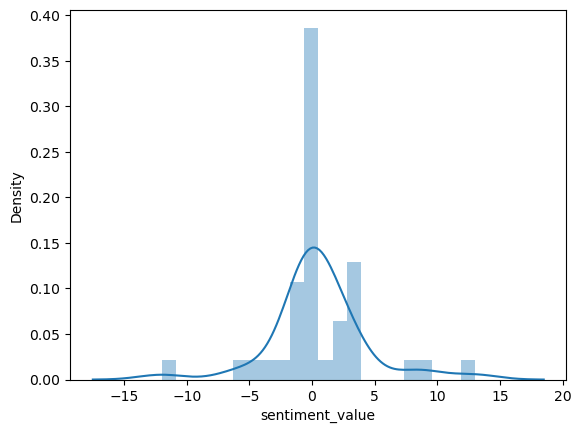

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

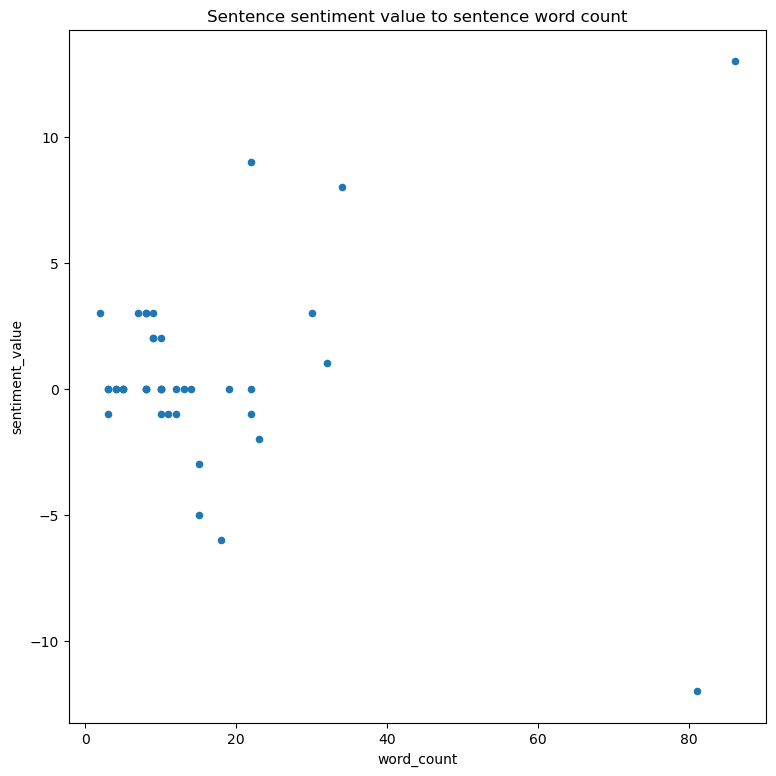

In [105]:
sent_df.plot.scatter(x='word_count',
                     y='sentiment_value',
                     figsize=(9,9),
                     title='Sentence sentiment value to sentence word count')